<div class="alert alert-block alert-info"><b>Instructor Note:</b> This project is intended for AP Statistics and/or AP Computer Science students seeking to learn modern data science skills. We'll use data from the US Department of Education's <a href="https://collegescorecard.ed.gov/data/">College Scorecard Database</a> to see which colleges are worth the price of admission. Instructions, walkthrough videos, and additional support for teachers can be found <a href="https://skewthescript.org/data-science-challenge">here</a>.
<br>In this notebook (the 4th of 4 total notebooks), students will...
<li>Fit polynomial models on a subset of the data</li><li>Tune models based on the principles of underfitting and overfitting </li><li>Use machine learning principles to compare the prediction strength of different models</li></div>

<div class="alert alert-block alert-success">

**Reference Guide for Python (student resource) -** Check out our <a href = "https://docs.google.com/document/d/1DaWN9HWInSBxSMhU0b5BetHlBM4n-ylqDiA8SJrhb7c/edit?tab=t.0">reference guide</a> for a full listing of useful Python commands for this project. 

<div>

<img src="https://skewthescript.org/s/money_college_scale.jpg">

## Data Science Project: Use data to determine the best and worst colleges for conquering student debt.

### Notebook 4: Machine Learning

Does college pay off? We'll use some of the latest data from the US Department of Education's <a href="https://collegescorecard.ed.gov/data/">College Scorecard Database</a> to answer that question. 

In this notebook (the 4th of 4 total notebooks), you'll use R to add polynomial terms to your multiple regression models (i.e. polynomial regression). Then, you'll use the principles of machine learning to tune models for a prediction task on *unseen* data.

In [ ]:
## Run this code but do not edit it. Hit Ctrl+Enter to run the code.
# This command downloads a useful package of Python commands
%pip install seaborn

import pyodide_http
pyodide_http.patch_all()

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf  # For statistical modeling
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For advanced data visualization

import warnings
warnings.filterwarnings("ignore")


<div class="alert alert-block alert-success">

### The Dataset (`four_year_colleges.csv`)

**General description** - In this notebook, we'll be using the `four_year_colleges.csv` file, which only includes schools that offer four-year bachelors degrees and/or higher graduate degrees. Community colleges and trade schools often have different goals (e.g. facilitating transfers, direct career education) than institutions that offer four-year bachelors degrees. By comparing four-year colleges only to other four-year colleges, we'll have clearer analyses and conclusions. 

This data is a subset of the US Department of Education's <a href="https://collegescorecard.ed.gov/data/">College Scorecard Database</a>. The data is current as of the 2020-2021 school year.

**Description of all variables:** See <a href="https://docs.google.com/document/d/1C3eR6jZQ2HNbB5QkHaPsBfOcROZRcZ0FtzZZiyyS9sQ/edit">here</a>

**Detailed data file description:** See <a href="https://docs.google.com/spreadsheets/d/1fa_Bd3_eYEmxvKPcu3hK2Dgazdk-9bkeJwONMS6u43Q/edit?usp=sharing">here</a></div>

In [6]:
## Run this code but do not edit it. Hit Ctrl+Enter to run the code.
# This command downloads data from the file 'our_year_colleges.csv' and stores it in an object called `four_year_col`
four_year_col = pd.read_csv('https://ds-modules.github.io/ds-challenge-assets/four_year_colleges.csv')
four_year_col.head()

,OPEID,name,city,state,region,median_debt,default_rate,highest_degree,ownership,locale,...,avg_cost,net_tuition,ed_spending_per_student,avg_faculty_salary,pct_PELL,pct_fed_loan,grad_rate,pct_firstgen,med_fam_income,med_alum_earnings
0,100200,Alabama A & M University,Normal,AL,South,15.250,12.1,Graduate,Public,Small City,...,23.445,8.101,4.836,7.599,70.95,75.04,28.66,36.582809,23.5530,36.339
1,105200,University of Alabama at Birmingham,Birmingham,AL,South,15.085,4.8,Graduate,Public,Small City,...,25.542,11.986,14.691,11.380,33.97,46.88,61.17,34.122367,34.4890,46.990
2,105500,University of Alabama in Huntsville,Huntsville,AL,South,14.000,4.7,Graduate,Public,Small City,...,24.861,8.279,8.320,9.697,24.03,38.55,57.14,31.013216,44.7870,54.361
3,100500,Alabama State University,Montgomery,AL,South,17.500,12.8,Graduate,Public,Small City,...,21.892,9.302,9.579,7.194,73.68,78.05,31.77,34.343434,22.0805,32.084
4,105100,The University of Alabama,Tuscaloosa,AL,South,17.671,4.0,Graduate,Public,Small City,...,30.016,14.705,9.650,10.349,17.18,36.44,72.14,22.571269,66.7335,52.751


### 1.0 - Motivating non-linear regression

So far, we've focused entirely on **linear regression** and **multiple linear regression** models, which use linear functions to relate predictors (e.g. `net_tuition`,`grad_rate`,`pct_PELL`) to the outcome (`default_rate`). 

In this notebook, we're going to investigate ways to model **non-linear** relationships. To make this task a bit more manageable at the start, let's reduce the size of our dataset by taking a random sample of 20 colleges from the `four_yeal_col` dataframe. We will store our sample in a new `pandas` dataframe called `sample_four_yeal_col`.

In [7]:
## Run this code but do not edit it
# create a dataset to train the model with 20 randomly selected observations
sample_four_year_col = four_year_col.sample(n=20, random_state=4)
sample_four_year_col

,OPEID,name,city,state,region,median_debt,default_rate,highest_degree,ownership,locale,...,avg_cost,net_tuition,ed_spending_per_student,avg_faculty_salary,pct_PELL,pct_fed_loan,grad_rate,pct_firstgen,med_fam_income,med_alum_earnings
585,285800,Farmingdale State College,Farmingdale,NY,Northeast,11.250,3.4,Graduate,Public,Suburb,...,16.856,5.637,10.189,8.418,33.08,39.45,53.20,39.704400,40.4615,61.646
813,342700,Coker University,Hartsville,SC,South,16.000,11.3,Graduate,Private nonprofit,Town,...,42.395,10.878,6.350,6.477,55.18,61.95,53.28,37.616099,31.5220,36.437
837,346600,Northern State University,Aberdeen,SD,Midwest,15.500,4.7,Graduate,Public,Town,...,21.388,5.468,9.979,7.539,15.33,27.99,45.22,30.691643,52.1700,43.429
787,338400,University of Scranton,Scranton,PA,Northeast,26.000,1.5,Graduate,Private nonprofit,Small City,...,62.380,21.682,13.123,10.390,18.86,64.37,81.54,20.347222,99.6550,69.236
112,143400,American University,Washington,DC,Northeast,20.190,1.7,Graduate,Private nonprofit,Large City,...,66.416,32.893,16.605,12.033,13.69,36.27,79.11,15.634344,84.2000,71.933
244,181300,Indiana University-Purdue University-Indianapolis,Indianapolis,IN,Midwest,13.741,4.2,Graduate,Public,Large City,...,21.127,11.959,18.926,8.586,35.50,40.49,52.40,35.086149,45.0020,47.542
358,213000,Boston University,Boston,MA,Northeast,22.423,1.4,Graduate,Private nonprofit,Large City,...,74.911,33.935,32.434,14.614,15.93,28.97,89.03,16.938272,81.2440,75.642
1046,396903,University of Minnesota-Rochester,Rochester,MN,Midwest,16.750,1.7,Bachelors,Public,Small City,...,25.495,14.281,5.950,6.875,35.49,54.20,54.46,18.656020,76.0285,61.201
472,249600,Northwest Missouri State University,Maryville,MO,Midwest,13.893,5.6,Graduate,Public,Town,...,20.235,7.317,7.318,7.379,30.63,53.38,54.05,30.808511,56.4700,43.505
835,346100,Dakota Wesleyan University,Mitchell,SD,Midwest,19.500,5.0,Graduate,Private nonprofit,Town,...,38.617,13.089,6.905,6.066,37.08,86.61,44.29,28.941685,68.7425,45.864


**Note:** When getting a random sample, we'll get different results each time we run our code because it's ... well ... random. This can be quite annoying. So, in the code above, we used the command `set.seed(2)`. This ensures that each time the code is executed, we get the same results for our random sample - the results stored in seed `2`. We could have also set the seed to `1` or `3` or `845` or `12345`. The seed numbers serve merely as a unique ID that corresponds to a certain result from a random draw. By setting a certain seed, we'll always get a certain random draw.

<div class="alert alert-block alert-info"><b>Instructor Note:</b> Technically, the random sampling in pandas and most other statistical software isn't <i>truly</i> random. It's pseudo-random. See discussion <a href = "https://simplicable.com/new/pseudorandom-vs-random">here</a>. For almost all purposes though, pseudo-random sampling gets the job done.

<div class="alert alert-block alert-warning">

**1.1** Let's take a look at our sample data set. Print out the `head` and `shape` of `sample_four_year_col`.

</div>

In [ ]:
# Your code goes here
...

,OPEID,name,city,state,region,median_debt,default_rate,highest_degree,ownership,locale,...,SAT_avg_4,SAT_avg_5,SAT_avg_6,SAT_avg_7,SAT_avg_8,SAT_avg_9,SAT_avg_10,SAT_avg_11,SAT_avg_12,phase
585,285800,Farmingdale State College,Farmingdale,NY,Northeast,11.25,3.4,Graduate,Public,Suburb,...,1335469140625,1435629326171875,1543301525634765625,-1157826576486598565,-8731716784553499103,2797190123150236819,160098371847667017,6085053072856078731,-7162092846606187855,train
813,342700,Coker University,Hartsville,SC,South,16.00,11.3,Graduate,Private nonprofit,Town,...,1032386052096,1040645140512768,1048970301636870144,5897651848520663040,4981471574352723968,3808958898547720192,2507802404515217408,660885653130575872,2089951702076620800,train
837,346600,Northern State University,Aberdeen,SD,Midwest,15.50,4.7,Graduate,Public,Town,...,1567907169921,1754488123141599,1963272209795449281,1739057989671103135,9097762702461488385,-2206264633266989217,3053581251318982721,4309766589674615839,8028610607702152065,train
787,338400,University of Scranton,Scranton,PA,Northeast,26.00,1.5,Graduate,Private nonprofit,Small City,...,2073600000000,2488320000000000,2985984000000000000,4512449700346986496,-8403117254224379904,6628303249868849152,3417204073802235904,5467704199162626048,-5795851245449117696,train
112,143400,American University,Washington,DC,Northeast,20.19,1.7,Graduate,Private nonprofit,Large City,...,3110228525056,4130383481274368,5485149263132360704,-2185687675497873408,-6454413488776282112,6274881180038856704,-4886114225115627520,4494222992208822272,-8416946228578746368,train


In [ ]:
# Your code goes here
...

(20, 26)

<div class="alert alert-block alert-info">

**Check yourself:** The dimensions of `sample_four_year_col` should be 20 rows and 26 columns.</div>

In prior notebooks, we focused on institutional and economic predictors of student loan default rates. In this notebook, we'll begin by analyzing an *academic* variable: `SAT_avg`. This variable shows the average SAT score of students who matriculate to a college.

The following code creates a scatterplot of the relationship between `SAT_avg` (predictor) and `default_rate` (outcome) from the dataset `sample_four_year_col`:

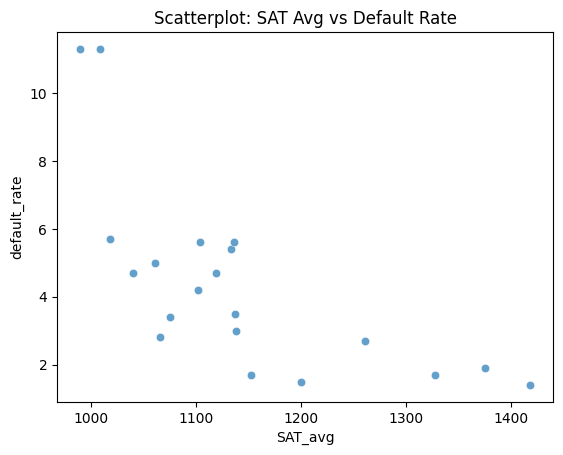

In [11]:
## Run this code but do not edit it
# create scatterplot: default_rate ~ SAT_avg
sns.scatterplot(x='SAT_avg', y='default_rate', data=sample_four_year_col, alpha=0.7)
plt.title('Scatterplot: SAT Avg vs Default Rate')
plt.show()

<div class="alert alert-block alert-warning">

**1.2 -** Describe the direction of the relationship between `SAT_avg` and `default_rate`. Is it positive or negative? Why do you think this is?

</div>

**Double-click this cell to type your answer here:** ...

<div class="alert alert-block alert-warning">

**1.3 -** Create the same scatterplot as above, but with the simple linear model between `default_rate` (outcome) and `SAT_avg` (predictor) overlayed on top.

**Hint:** Recall the `lmplot` command from notebook 2.

</div>

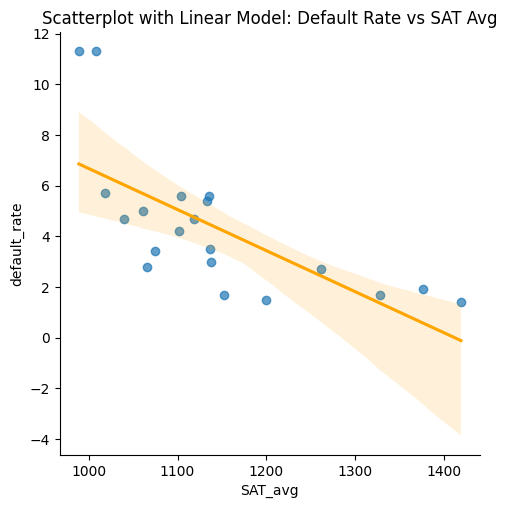

In [ ]:
# Your code goes here
...

<div class="alert alert-block alert-warning">

**1.4 -** Would you say that this model provides a "good" fit for this dataset? Explain.

</div>

**Double-click this cell to type your answer here:** ...

<div class="alert alert-block alert-warning">

**1.5 -** Use the `ols` command from the `statsmodel` package to fit the linear regression model, where we use `SAT_avg` (predictor) to predict `default_rate` (outcome) in the dataset `sample_four_year_col`. Store the model in a variable named `sat_model_1` and use the `summary` command to print out information about the model fit.

</div>

In [ ]:
# Your code goes here
...

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           default_rate   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     16.54
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           0.000723
Time:                        15:45:55   Log-Likelihood:                -41.929
No. Observations:                  20   AIC:                             87.86
Df Residuals:                      18   BIC:                             89.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8774      4.578      4.998      0.000      13.260      32.495
SAT_avg       -0.0162      0.004     -4.067      0.001      -0.025      -0.008
==============================================================================
Omnibus:                        5.111   Durbin-Watson:                   2.658
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                3.128
Skew:                           0.934   Prob(JB):                        0.209
Kurtosis:                       3.514   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-info">

**Check yourself:** The $R^2$ value shown in the model summary should be 0.479 </div>

<div class="alert alert-block alert-warning">

**1.6** - Does the model's $R^2$ value indicate that this model provides a strong fit for this dataset? Explain.

</div>

**Double-click this cell to type your answer here:** ...

<div class="alert alert-block alert-warning">

**1.7** - If this model were curved, rather than linear, do you believe the $R^2$ could be higher? Explain.

</div>

**Double-click this cell to type your answer here:** ...

### 2.0 - Polynomial regression

Recall that simple linear regression follows this formula:

$$
\hat{y} = \beta_{0} + \beta_{1}x
$$
Where:

- $\beta_0$ is the intercept

- $\beta_1$ is the slope (coefficient of $x$)

- $\hat{y}$ is the predicted `default_rate`

- $x$ is the value of `SAT_avg`

If we want to capture the curvature in a scatter plot by creating a non-linear model, we can use a technique called **polynomial regression**. For example, we could use a degree 2 polynomial (quadratic), which looks like this:

$$
\hat{y} = \beta_{0} + \beta_{1}x + \beta_{2}x^2
$$

Where:

- $\beta_0$ is the intercept

- $\beta_1$ is the coefficient of $x$ (linear term)

- $\beta_2$ is the coefficient of $x^2$ (squared term)

- $\hat{y}$ is the predicted `default_rate`

- $x$ is the `SAT_avg`

Below, we visualize the fit of this degree-2 polynomial (quadratic) model between `SAT_avg` and `default_rate`:

<div class="alert alert-block alert-info"><b>Instructor Note:</b> To fit a degree 2 polynomial we use the <code>lmplot</code> command from the <code>seaborn</code> package, where <code>order</code> set to two(2) represents the degree of the polynomial.

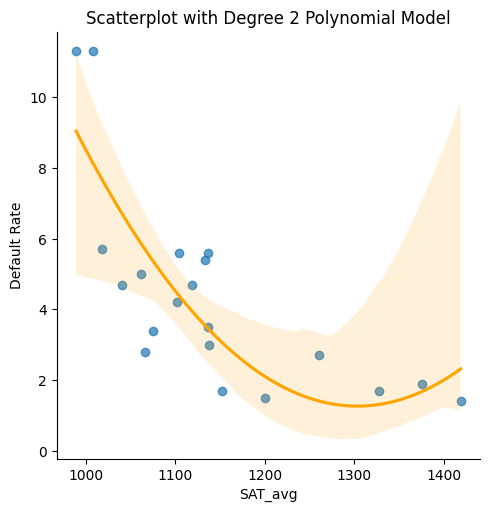

In [14]:
## Run this code but do not edit it
# create scatterplot: default_rate ~ SAT_avg, with degree 2 polynomial model overlayed
sns.lmplot(
    x='SAT_avg', 
    y='default_rate', 
    data=sample_four_year_col, 
    order=2,  # Fit a degree-2 polynomial
    line_kws={'color': 'orange'},  # Set the line color to orange
    scatter_kws={'alpha': 0.7}  # Adjust transparency of scatter points
)
plt.title('Scatterplot with Degree 2 Polynomial Model')
plt.xlabel('SAT_avg')
plt.ylabel('Default Rate')
plt.show()

<div class="alert alert-block alert-warning">

**2.1** - Make a prediction: Will this polynomial regression model have a higher or lower $R^2$ value than the linear regression model? Justify your reasoning.

</div>

**Double-click this cell to type your answer here:** ...

Let's test your prediction. To do so, we'll first need to fit the polynomial model. We can fit a degree 2 polynomial to the data by first squaring all the values in `SAT_avg` and then using the `ols` function from the `statsmodels` package. Run the cell below to see how it's done.

<div class="alert alert-block alert-info"><b>Instructor Note:</b> You may remember the <code>ols</code> function of the <code>statsmodels.formula.api</code> package handles multiple predictor attributes; we did this in the Notebook 3 to explore multiple regression. The only difference now is we will add a sqaured term by squaring the <code>sample_four_year_col</code> data. The command <code>sample_four_year_col['SAT_avg'] ** 2</code> takes all the values of <code>SAT_avg</code> column to the power of 2. This provides both a linear term <code>SAT_avg</code> and a squared term <code>SAT_avg^2</code>.

In [15]:
## Run this code but do not edit it
# degree 2 polynomial model for default_rate ~ SAT_avg
sample_four_year_col['SAT_avg_squared'] = sample_four_year_col['SAT_avg'] ** 2
sat_model_2 = smf.ols(formula='default_rate ~ SAT_avg + SAT_avg_squared', data=sample_four_year_col).fit()
print(f"Intercept: {sat_model_2.params['Intercept']}")
print(f"Linear Coefficient: {sat_model_2.params['SAT_avg']}")
print(f"Quadratic Coefficient: {sat_model_2.params['SAT_avg_squared']}")


Intercept: 134.98173787438915
Linear Coefficient: -0.20518473309633334
Quadratic Coefficient: 7.871250324408593e-05


The equation for this model would be

$$
\hat{y}=134.98-0.2051x+0.000079x^2
$$

Where:

- $\beta_0=134.98$ is the intercept

- $\beta_1=-0.2051$ is the coefficient of $x$, the linear term

- $\beta_2=0.000079$ is the coefficient of $x^2$, the squared term

- $\hat{y}$ is the predicted `default_rate`

- $x$ is the `SAT_avg`

<div class="alert alert-block alert-info"><b>Instructor Note:</b> Students might want to know how they can interpret each of the coefficient values here. Interpreting these coefficients is quite tricky - there is no longer a simple "slope" to interpret. In fact, it's not worth the class time to nail down the interpretation of polynomial coefficients. Instead, it's worth mentioning that adding polynomial terms presents a tradeoff: the model fit might improve, but the model itself becomes less interpretable. After this point, the rest of the notebook will discuss a different tradeoff: adding more polynomial terms may cause our model to overfit to our dataset. See section 3 below.
</div>

<div class="alert alert-block alert-warning">

**2.2 -** Use the `summary` command on `sat_model_2` to see summary information about the quadratic model.

</div>

In [ ]:
# Your code goes here
...

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           default_rate   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     16.11
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           0.000119
Time:                        15:49:07   Log-Likelihood:                -37.817
No. Observations:                  20   AIC:                             81.63
Df Residuals:                      17   BIC:                             84.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         134.9817     38.318      3.523      0.003      54.137     215.826
SAT_avg            -0.2052      0.064     -3.188      0.005      -0.341      -0.069
SAT_avg_squared  7.871e-05   2.68e-05      2.940      0.009    2.22e-05       0.000
==============================================================================
Omnibus:                        0.605   Durbin-Watson:                   2.421
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.632
Skew:                           0.137   Prob(JB):                        0.729
Kurtosis:                       2.173   Cond. No.                     1.33e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-info">

**Check yourself:** The $R^2$ value shown in the model summary should be 0.655 </div>

<div class="alert alert-block alert-warning">

**2.3 -** How does this model's $R^2$ value compare to that of the linear model? Was your prediction right? Explain.

</div>

**Double-click this cell to type your answer here:** ...

This analysis raises a natural question: Why stop at degree 2? By raising the degree, we can add more curves to our model, potentially better fitting the data! Let's visualize what happens when we increase the degree in our polynomial regression models.

#### Degree 3 Polynomial Model

$$
\hat{y} = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3
$$

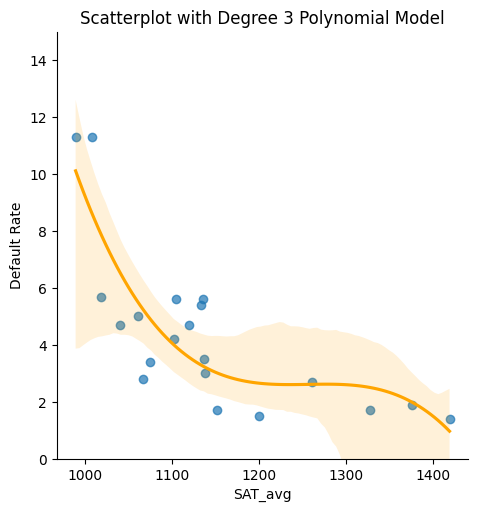

In [ ]:
## Run this code but do not edit it
# create scatterplot: default_rate ~ SAT_avg, with degree 3 polynomial model overlayed
sns.lmplot(
    x='SAT_avg', 
    y='default_rate', 
    data=sample_four_year_col, 
    order=3,  # Fit a degree-3 polynomial
    line_kws={'color': 'orange'},  # Set the line color to orange
    scatter_kws={'alpha': 0.7}  # Adjust transparency of scatter points
)
plt.ylim(0, 15)
plt.title('Scatterplot with Degree 3 Polynomial Model')
plt.xlabel('SAT_avg')
plt.ylabel('Default Rate')
plt.show()

#### Degree 5 Polynomial Model

$$
\hat{y} = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3 + \beta_{4}x^4 + + \beta_{5}x^5
$$

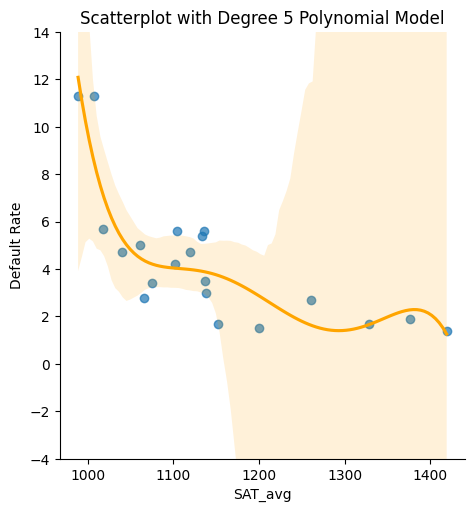

In [20]:
## Run this code but do not edit it
# create scatterplot: default_rate ~ SAT_avg, with degree 5 polynomial model overlayed
sns.lmplot(
    x='SAT_avg', 
    y='default_rate', 
    data=sample_four_year_col, 
    order=5,  # Fit a degree-5 polynomial
    line_kws={'color': 'orange'},  # Set the line color to orange
    scatter_kws={'alpha': 0.7}  # Adjust transparency of scatter points
)
plt.ylim(-4, 14)
plt.title('Scatterplot with Degree 5 Polynomial Model')
plt.xlabel('SAT_avg')
plt.ylabel('Default Rate')
plt.show()

#### Degree 12 Polynomial Model

$$
\hat{y} = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3 + \beta_{4}x^4 + + \beta_{5}x^5 + + \beta_{6}x^6 + ... + \beta_{12}x^{12}
$$

**Note:** The following code is pre-run, to save computer space.

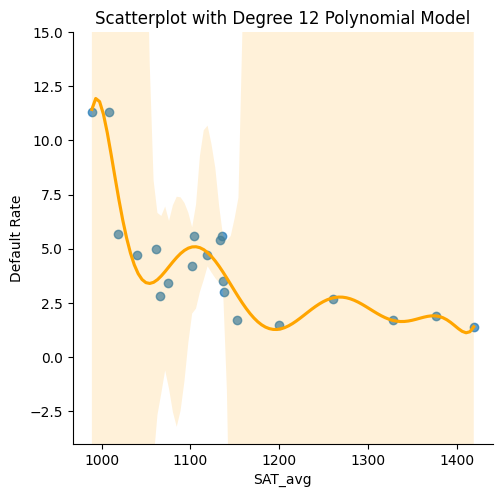

In [23]:
## Note: This code was pre-run, to save computer space
# create scatterplot: default_rate ~ SAT_avg, with degree 12 polynomial model overlayed
sns.lmplot(
    x='SAT_avg', 
    y='default_rate', 
    data=sample_four_year_col, 
    order=12,  # Fit a degree-12 polynomial
    line_kws={'color': 'orange'},  # Set the line color to orange
    scatter_kws={'alpha': 0.7}  # Adjust transparency of scatter points
)
plt.ylim(-4, 15)
plt.title('Scatterplot with Degree 12 Polynomial Model')
plt.xlabel('SAT_avg')
plt.ylabel('Default Rate')
plt.show()

<div class="alert alert-block alert-info"><b>Instructor Note:</b> Because this dataset has 20 data values, the mathematical maximum number of polynomial terms we could have is 19. This would produce a curve that's so wavy that it would go through every point exactly. However, when creating such high-order polynomial models, the numerical estimates become <b>very</b> large (e.g. imagine an SAT score of 1300 raised to the 19th power!). This creates numerical instability leading to errors. So, when demonstrating this concept to students, we recommend not going past the 12th order polynomial.
</div>

<div class="alert alert-block alert-warning">

**2.4 -** Examine each plot for the polynmial models with degrees 1-12. Which model do you think would have the largest $R^2$ value? Why?

</div>

**Double-click this cell to type your answer here:** ...

To determine which polynomial model fits the data the best, we will fit models for each degree 1-12.

In [12]:
## Run this code but do not edit it
# degree 1-12 polynomial models for default_rate ~ SAT_avg
models = {}
for term in range(1,13):
    sample_four_year_col[f'SAT_avg_{term}'] = sample_four_year_col['SAT_avg'] ** term
    formula = 'default_rate ~ ' + ' + '.join([f'SAT_avg_{i}' for i in range(1, term+1)])
    model = smf.ols(formula=formula, data=sample_four_year_col).fit()
    models[term] = model
    print(f"Degree-{term} Polynomial R-squared: {model.rsquared}")


Degree-1 Polynomial R-squared: 0.4788921473444998
Degree-2 Polynomial R-squared: 0.6545704728172126
Degree-3 Polynomial R-squared: 0.7074433663688182
Degree-4 Polynomial R-squared: 0.6966611436430901
Degree-5 Polynomial R-squared: 0.6846187610491921
Degree-6 Polynomial R-squared: 0.6708364046613713
Degree-7 Polynomial R-squared: 0.6919965517621345
Degree-8 Polynomial R-squared: 0.73065171404479
Degree-9 Polynomial R-squared: 0.7471236278636344
Degree-10 Polynomial R-squared: 0.7553515267923839
Degree-11 Polynomial R-squared: 0.8195290017333857
Degree-12 Polynomial R-squared: 0.8253009823798665


<div class="alert alert-block alert-info">

**Check yourself:** The $R^2$ for the degree 5 model should be about 0.685 </div>

<div class="alert alert-block alert-warning">

**2.5 -** The degree 12 model has the highest $R^2$ value. Does that mean it's the "best" model? Why or why not?

**Hint:** Think about which model would do the best for predicting *the rest of the data* from the original full dataset.

</div>

**Double-click this cell to type your answer here:** ...

### 3.0 - Prediction, model tuning, & machine learning

In prior notebooks, we've used our models to make inferences about default rates. However, sometimes in data science, we care more about predictions than we do about inferences. In particular, many data science tasks ask for making accurate predictions on *new* data - data that hadn't yet been collected when we first fit the model. This process of building models to predict new data, especially when it's automated, is called **machine learning.** 

The key to machine learning is building models that make accurate predictions on **test** data - unseen data that weren't used when fitting the model. Let's see how this works. First, let's create a test dataset of 10 randomly sampled colleges. Importantly, these are colleges that **our models didn't see while fitting**:

In [36]:
## Run this code but do not edit it
# create a data set to test the model with 10 new, randomly selected observations
# not used to train the model
test_four_year_col = four_year_col.sample(n=10, random_state=27)
test_four_year_col

,OPEID,name,city,state,region,median_debt,default_rate,highest_degree,ownership,locale,...,avg_cost,net_tuition,ed_spending_per_student,avg_faculty_salary,pct_PELL,pct_fed_loan,grad_rate,pct_firstgen,med_fam_income,med_alum_earnings
586,285900,SUNY Morrisville,Morrisville,NY,Northeast,12.000,10.7,Bachelors,Public,Rural,...,27.687,4.913,13.715,6.434,56.20,68.61,37.87,35.061464,37.9740,41.739
726,321000,Oregon State University,Corvallis,OR,Far West,15.500,2.8,Graduate,Public,Small City,...,27.595,12.616,11.902,10.436,22.99,36.51,69.32,31.369606,44.4500,56.619
416,232900,Wayne State University,Detroit,MI,Midwest,16.500,5.1,Graduate,Public,Large City,...,24.541,11.336,12.491,11.123,43.10,49.44,51.89,37.602009,28.6055,46.679
385,221900,Tufts University,Medford,MA,Northeast,15.500,1.1,Graduate,Private nonprofit,Suburb,...,76.151,38.212,24.748,12.616,11.38,20.86,93.91,15.295481,85.9295,67.122
924,364600,Texas Woman's University,Denton,TX,Rockies & Southwest,14.000,5.1,Graduate,Public,Small City,...,19.418,6.080,6.595,8.764,39.00,43.88,48.14,41.578683,32.1240,49.724
971,815500,The Evergreen State College,Olympia,WA,Far West,14.500,6.5,Graduate,Public,Suburb,...,24.371,7.913,10.111,7.371,47.59,48.80,44.87,30.090090,22.2000,40.782
1039,141704,University of Connecticut-Waterbury Campus,Waterbury,CT,Northeast,19.292,2.0,Graduate,Public,Suburb,...,18.464,3.084,4.039,15.777,44.17,45.41,65.07,26.649329,67.7370,72.460
177,160100,University of West Georgia,Carrollton,GA,South,14.000,7.4,Graduate,Public,Town,...,23.684,7.033,7.933,7.368,45.32,53.58,44.35,31.880519,36.5950,45.011
309,197700,Murray State University,Murray,KY,South,15.500,6.0,Graduate,Public,Town,...,21.349,7.490,9.010,6.535,31.15,40.71,53.36,33.955740,46.0640,41.894
733,320900,Western Oregon University,Monmouth,OR,Far West,15.000,5.1,Graduate,Public,Town,...,22.810,6.168,10.152,6.929,37.99,75.50,45.08,41.938775,41.7100,47.041


<div class="alert alert-block alert-warning">

**3.1 -** Use the `head` command on the `test_four_year_col` data set.

</div>

In [ ]:
# Your code goes here
...

,OPEID,name,city,state,region,median_debt,default_rate,highest_degree,ownership,locale,...,avg_cost,net_tuition,ed_spending_per_student,avg_faculty_salary,pct_PELL,pct_fed_loan,grad_rate,pct_firstgen,med_fam_income,med_alum_earnings
586,285900,SUNY Morrisville,Morrisville,NY,Northeast,12.0,10.7,Bachelors,Public,Rural,...,27.687,4.913,13.715,6.434,56.20,68.61,37.87,35.061464,37.9740,41.739
726,321000,Oregon State University,Corvallis,OR,Far West,15.5,2.8,Graduate,Public,Small City,...,27.595,12.616,11.902,10.436,22.99,36.51,69.32,31.369606,44.4500,56.619
416,232900,Wayne State University,Detroit,MI,Midwest,16.5,5.1,Graduate,Public,Large City,...,24.541,11.336,12.491,11.123,43.10,49.44,51.89,37.602009,28.6055,46.679
385,221900,Tufts University,Medford,MA,Northeast,15.5,1.1,Graduate,Private nonprofit,Suburb,...,76.151,38.212,24.748,12.616,11.38,20.86,93.91,15.295481,85.9295,67.122
924,364600,Texas Woman's University,Denton,TX,Rockies & Southwest,14.0,5.1,Graduate,Public,Small City,...,19.418,6.080,6.595,8.764,39.00,43.88,48.14,41.578683,32.1240,49.724


The following code visualizes the new test data alongside the training data (the data we used to originally fit our models).

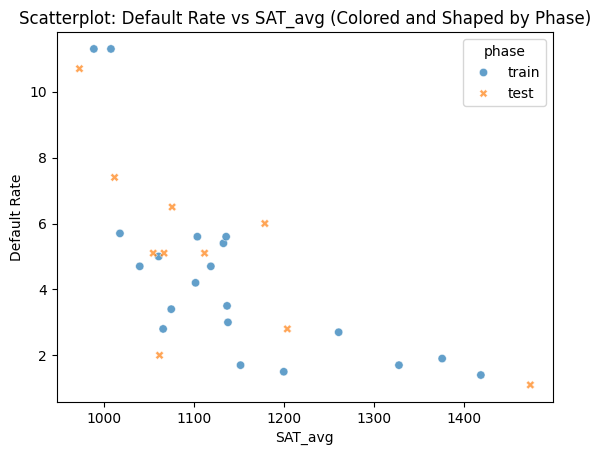

In [38]:
## Run this code but do not edit it
# label train and test sets
sample_four_year_col['phase'] = 'train'
test_four_year_col['phase'] = 'test'

# Concatenate the two datasets
test_and_sample_four_year_col = pd.concat([sample_four_year_col, test_four_year_col], ignore_index=True)

# Create scatterplot: default_rate ~ SAT_avg, colored and shaped by phase
sns.scatterplot(
    x='SAT_avg', 
    y='default_rate', 
    hue='phase',  # Color points by phase
    style='phase',  # Shape points by phase
    data=test_and_sample_four_year_col, 
    alpha=0.7  # Adjust transparency
)

# Add title and labels
plt.title('Scatterplot: Default Rate vs SAT_avg (Colored and Shaped by Phase)')
plt.xlabel('SAT_avg')
plt.ylabel('Default Rate')
plt.show()

<div class="alert alert-block alert-warning">

**3.2 -** Of all the polynomial models we fit before, which do you think would do best in predicting the default rates in the test dataset? 

**Note:** Use your gut and intution here. No calculations required.

</div>

**Double-click this cell to type your answer here:** ...

Let's see how good one of our models is at predicting default rates. The `statsmodel` package in the next cell uses the `predict` function to make predictions on the test dataset. In this case, output shows the predicted default rates for the 10 test set colleges, as predicted by our degree 5 model.

In [47]:
## Run this code but do not edit it
# get predictions for degree 5 model

# Create a DataFrame with the SAT_avg values from the test dataset
new_data = pd.DataFrame({'SAT_avg': test_four_year_col['SAT_avg']})

# Add polynomial terms for degree 5
for degree in range(1, 6):
    new_data[f'SAT_avg_{degree}'] = new_data['SAT_avg'] ** degree

# Make predictions using the degree-5 model
pred_deg5 = models[5].predict(new_data)

# Display the predictions with name column
pred_deg5_with_name = pd.DataFrame({
    'name': test_four_year_col['name'],
    'SAT Avg': test_four_year_col['SAT_avg'],
    'Actual Default Rate': test_four_year_col['default_rate'],
    'Predicted Degree 5 Default Rate': pred_deg5
})
pred_deg5_with_name

,name,SAT Avg,Actual Default Rate,Predicted Degree 5 Default Rate
586,SUNY Morrisville,973,10.7,10.717052
726,Oregon State University,1204,2.8,2.367045
416,Wayne State University,1112,5.1,3.843706
385,Tufts University,1474,1.1,-2.402643
924,Texas Woman's University,1067,5.1,5.444374
971,The Evergreen State College,1076,6.5,5.074840
1039,University of Connecticut-Waterbury Campus,1062,2.0,5.660333
177,University of West Georgia,1012,7.4,8.229357
309,Murray State University,1179,6.0,2.556105
733,Western Oregon University,1055,5.1,5.975413


So, how can we interpret these values? Well, the last college in our test set is `Wayne State University`, which has an `SAT_avg` value of `1112` and an actual `default_rate` of `5.1`. It's shown here on the graph, alongside our degree 5 model. 


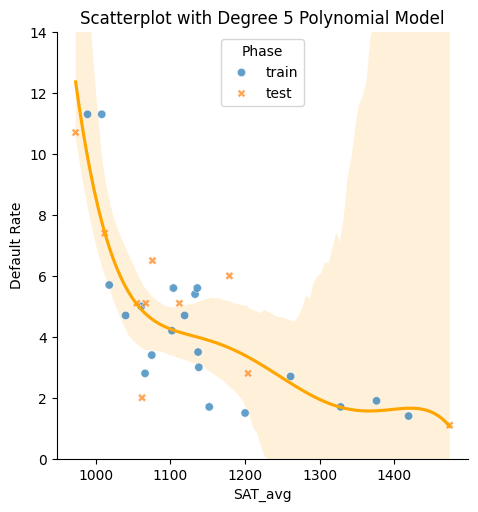

In [46]:
### Run this code but do not edit it
## create scatterplot: default_rate ~ SAT_avg, with degree 5 polynomial model overlayed
# Scatterplot: default_rate ~ SAT_avg, colored and shaped by phase
# Fit and overlay a degree-5 polynomial regression line
# NOTE: We needed to plot the regression line with lmplot() as we did earlier but 
# did not include the scatter plot because we wanted to depict the train and test
# data with different style markers -- lmplot does not support this!

# Create scatterplot with degree-5 polynomial regression line
sns.lmplot(
    x='SAT_avg', 
    y='default_rate', 
    data=test_and_sample_four_year_col, 
    order=5,  # Fit a degree-5 polynomial
    line_kws={'color': 'orange'},  # Set the regression line color
    legend=False,  # Avoid duplicate legends
    scatter=False
)

# Add scatterplot styling (color and shape by phase)
sns.scatterplot(
    x='SAT_avg', 
    y='default_rate', 
    hue='phase', 
    style='phase', 
    data=test_and_sample_four_year_col, 
    alpha=0.7, 
    legend=True  # Avoid duplicate legends
)

# Customize the plot
plt.ylim(0, 14)
plt.title('Scatterplot with Degree 5 Polynomial Model')
plt.xlabel('SAT_avg')
plt.ylabel('Default Rate')
plt.legend(title='Phase')

# Show the plot
plt.show()

Our degree 5 model's predicted default rate for this data point was `3.84`.  That means that our degree 5 model under-estimates the actual value for default rate by...

$$
5.1-3.84 = 1.26
$$

The model's prediction and error is visualized in the plot below:

<img src="https://ds-modules.github.io/ds-challenge-assets/wayne-error.png" width = "55%" height = "55%" align = left>


So, its predicted default rate is "off" by about 1 percentage point! This is pretty amazing, considering the model had only 20 training data values and the `Wayne State University` wasn't included among them. This is the power of machine learning! Predicting previously *unseen* data!

This is just one prediction. We're really interested in how this model performed across all its predictions. For that, let's measure its $R^2$ (prediciton strength) on the test set!

We can use the `cor` function to correlate the predictions with the actual default rates ($r$) and then square that value to get $R^2$, which gets us the prediction strength!

In [41]:
## Run this code but do not edit it
# Calculate the correlation between actual and predicted default rates
correlation = np.corrcoef(test_four_year_col['default_rate'], pred_deg5)[0, 1]

# Square the correlation to get R-squared
r_squared = correlation ** 2

# Print the result
print(f"R-squared: {r_squared}")

R-squared: 0.6374432120023875


We can now repeat this same process for all polynomial degrees.

In [42]:
## Run this code but do not edit it
# Storing test set predictions for all models
# Create a DataFrame with the SAT_avg values from the test dataset
new_data = pd.DataFrame({'SAT_avg': test_four_year_col['SAT_avg']})

# Add polynomial terms for degree 5 (if not already added)
for degree in range(1, 13):
    new_data[f'SAT_avg_{degree}'] = new_data['SAT_avg'] ** degree
    pred_deg = models[degree].predict(new_data)
    print(f"Degree-{degree} Polynomial R-squared: {np.corrcoef(test_four_year_col['default_rate'], pred_deg)[0, 1] ** 2}")


Degree-1 Polynomial R-squared: 0.4943008883486531
Degree-2 Polynomial R-squared: 0.48189093450539466
Degree-3 Polynomial R-squared: 0.681519695860946
Degree-4 Polynomial R-squared: 0.6617462573737412
Degree-5 Polynomial R-squared: 0.6374432120023875
Degree-6 Polynomial R-squared: 0.26247307046114154
Degree-7 Polynomial R-squared: 0.26248909251808406
Degree-8 Polynomial R-squared: 0.2623089116314324
Degree-9 Polynomial R-squared: 0.26236338220567645
Degree-10 Polynomial R-squared: 0.2624155188778881
Degree-11 Polynomial R-squared: 0.2624031604062709
Degree-12 Polynomial R-squared: 0.2623178327058065


<div class="alert alert-block alert-info">

**Check yourself:** The $R^2$ for the degree 5 model should be about 0.637 </div>

<div class="alert alert-block alert-warning">

**3.3 -** Compare the $R^2$ estimates for each model. Which models did well? Which models did poorly? Why do you think this is?

</div>

**Double-click this cell to type your answer here:** ...

<div class="alert alert-block alert-warning">

**3.4 -** In machine learning, the central goal is to build our models so as to avoid "underfitting" and "overfitting" our models to the training data. What do you think these terms mean? Which of our models were underfit? Which do you think were overfit? Explain.

</div>

**Double-click this cell to type your answer here:** ...

Recall that we built our polynomial models here with just one predictor: $x$ (`SAT_avg`). Yet, those models could end up being quite complex...

$$
\hat{y} = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3
$$

Now, imagine that we wanted to bring in multiple predictors ($x_1$ = `SAT_avg`, $x_2$ = `net_tuition`, $x_3$ = `grad_rate`) for muliple regression. Plus, imagine that we decided to add in some polynomial terms for each of these predictors. We could end up with a model that looks ever more complicated, with literally hundreds of terms...

$$
\hat{y} = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_1^2 + \beta_{3}x_1^3 + \beta_{4}x_2 + \beta_{5}x_2^2 + \beta_{5}x_2^3 + \beta_{6}x_3 + \beta_{7}x_3^2 + ...
$$

<div class="alert alert-block alert-warning">

**3.5 -** Is it always good to add more predictors and add more polynomial terms to your model? Explain why or why not.

</div>

**Double-click this cell to type your answer here:** ...

### 4.0 - In-class prediction competition

Now you have all the tools you need to build very powerful prediction models! This means that it's time for a friendly competition :)

The code below takes the full dataset and splits it into larger train and test datasets. 80% of the colleges will go into the train dataset. 20% will go into the test dataset. Because we all are setting the same seed (`2025`), everyone will get the exact same train and test sets:

In [300]:
## Run but do not edit this code

np.random.seed(2025)

# Calculate the training data size (80% of the dataset)
train_size = int(0.8 * len(four_year_col))

# Sample row indices for the training set
train_ind = np.random.choice(four_year_col.index, size=train_size, replace=False)

# Split the dataset into training and testing sets
train = four_year_col.loc[train_ind]  # Training set
test = four_year_col.drop(train_ind)  # Testing set

In [301]:
train.shape

(842, 26)

In [302]:
test.shape

(211, 26)

Now it's time to compete! 

**Goal:** Create the most accurate prediction model of colleges' default rates.

**Evaluation:** Whichever student has the highest $R^2$ on the test set wins.

**Guidelines** Save your best model as an object called `my_model`. You are only allowed to fit models on the train set (not on the test set). You may use as many predictors and as many polynomial terms as you'd like. Just be warned: Don't fall into the trap of overfitting! Choose only the most important variables and keep your models simple, so that you can generalize well to the test set. Periodically test your model on the test set and then make adjustments as necessary. 

Go!

In [ ]:
## Your code goes here
# Replace 'grad_rate + np.power(SAT_avg, 2) + np.power(SAT_avg, 3)' with your own combo of variables and poly terms
...


Degree-3 Polynomial R-squared: 0.6010955853979743


In [304]:
# run this code to get the R^2 value on the test set from your model
test_predictions = my_model.predict(test)

# Calculate the R^2 value on the test set
correlation = np.corrcoef(test['default_rate'], test_predictions)[0, 1]
r_squared = correlation ** 2
print(f"The test R^2 value was: {r_squared}")

The test R^2 value was: 0.5773339114115961


<div class="alert alert-block alert-info">

<b>Instructor Note:</b> Students may wonder how they can prevent overfitting. There is no 100% guaranteed way to prevent overfitting. However, a sign of overfitting may be the $R^2$ value decreasing on the test data as the model increases in complexity. 

</div>

### 5.0 - NATIONWIDE prediction competition

**Competition:** We're hosting a *nationwide* competition to see which student can build the best model for predicting student loan default rates at different colleges. Here's an <a href = "https://medium.com/@ds4e/second-year-surge-after-the-ap-data-science-challenge-captivates-9000-students-94772bad9789">article</a> about last year's winners.

**Evaluation**: Across the country, all students are using the same train and test sets as you did in the prior exercise to fit and evaluate their models. Your goal: Build a model that gives the best predictions on this test set. The student models that produce the highest $R^2$ value on the test set will be announced as champions! Note: this year's train and test sets are different from prior years, so replicating a prior winning model won't be a winning strategy.

**Submission Process (due by June 6, 2025 at 11:59pm CT)**:
 1. Print and have a parent/guardian sign the <a href = "https://drive.google.com/file/d/1JPOiYNJLtUM3QZQKlU0qhN0nSN3AZfJL/view?usp=sharing">media release form</a>. This form gives permission to feature you and publish your results, in the event that you're a finalist! Take a picture or scan the signed form and submit it during as a part of Step #2 (below).
 2. Submit <a href = "https://forms.gle/cSmFbv3djion2dDP8">this google form</a> (note: you'll have to log into a google account), which allows you to upload your media release form, model, and notebook. This counts as your final submission.

**Rules and notes to avoid disqualification:**
 - Do not change the seed (`2025`) in the code block that splits the data into the train and test sets. Using the common seed of `2025` will ensure everyone across the country has the exact same train/test split. 
 - Make sure your model is fit using the `train` data. In other words, it should look like: `my_model <- lm(default_rate ~ ..., data = train)`.
 - Your model must be fit using the `lm` command. Models outside the scope of the concepts covered in this project (e.g random forest, neural networks, etc) are not allowed. 
 - Your model must predict `default_rate` directly. Applying transformations (e.g., log, square root, scaling) to the outcome variable before modeling is not allowed. All submissions must use `default_rate` as provided in the dataset.
 - Transformations of predictors are allowed. You may apply transformations (e.g., log, standardization, polynomial terms, interaction terms) to the predictor variables to improve your model.
 - Make sure you find the $R^2$ value on the `test$default_rate` data, using the provided code.
 - Only individual submissions are allowed. Group submissions will not be accepted, and each participant must submit their own work. Note: Students can still share ideas and strategies with one another, but all final submissions must be an individual student's own work.
 - There are ways to "cheat" on this competition by looking directly at the test set data values and designing your model to predict those values exactly (or approximately). However, based on the design of your model (which we'll see when you share your notebook), it's pretty easy for us to tell if you've done this. So, don't do it! Your submission will be discarded.
 - Use online resources responsibly. We acknowledge that data science solutions, including similar problems and code, are publicly available online. You are encouraged to learn from these resources, but your submission must be your own work. Directly copying code or solutions without understanding and adapting them will result in disqualification.

<div class="alert alert-block alert-success">


### Summer Opportunity: Do you want to learn more about Data Science & AI?
Join our Data Science & AI Summer Bootcamp, where you'll take your learning from this project to the next level. **No prior coding or statistics experience required!** Designed by Harvard grads, the bootcamp allows students from all experience levels to dive deeper into data science concepts, from the basics (e.g. linear regression) to the advanced (e.g. AI neural networks). Students learn in a supportive and collaborative environment, and they walk away with their own real-world project that can be shared on college and internship applications.

📢 Scholarships are available! We’re committed to making this opportunity accessible to all students.

📝 Applications are considered on a rolling basis. Final application deadline: **May 30, 2025**

🔗 Learn more and apply here: https://skewthescript.org/bootcamps
</div>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8f82fdea-532b-4a4b-9937-108d7206dda5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>